In [12]:
using Plots, BenchmarkTools, LinearAlgebra, SparseArrays

In [3]:
function ode_rk4(f::Function, 
    t1::Real, 
    x1::Vector{<:Real}, 
    Npoints::Integer, 
    h = 1.0e-6) 
    tn = t1 .+ collect(0:1:(Npoints-1)) * h
    xn = zeros((length(x1), length(tn)))
    xn[:,1] = x1
    for i in 1:(Npoints-1)
        k1 = f(tn[i], xn[:, i])
        k2 = f(tn[i] + h/2, xn[:, i] .+ k1.*(h/2))
        k3 = f(tn[i] + h/2, xn[:,i] .+ k2 .*(h/2))
        k4 = f(tn[i] + h, xn[:, i] .+ k3 .* h)
        xn[:, i+1] = xn[:, i] .+ (k1 .+ (2.0 .* k2) .+ (2.0 .* k3) .+ k4).*(h/6)
    end
    return tn, xn
end

ode_rk4 (generic function with 2 methods)

In [35]:
function ode_finite_difference(p::Function, q::Function, r::Function, N::Integer, bc::Array{<:Real})
    h = (bc[2]-bc[1])/(N+1)
    tn = [bc[1] + k/(N+1)*(bc[2]-bc[1]) for k in 1:N]
    bn = [-h^2 * r(t) for t in tn]
    bn[1] += (1.0+h/2*p(tn[1]))*bc[3]
    bn[N] += (1.0-h/2*p(tn[end]))*bc[4]

    du = [-1.0 + h/2*p(tn[i]) for i in 1:N-1]
    dd = [2+h^2*q(tn[i]) for i in 1:N]
    dl = [-1-h/2*p(tn[i]) for i in 2:N]
    A = Tridiagonal(dl, dd, du)
    print(A)
    return A\bn
end

ode_finite_difference (generic function with 1 method)

In [55]:
x = ode_finite_difference(x->0.0, x-> 0.0, x->-400.0, 30, [-2, 2, 0, 0])

[2.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; -1.0 2.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 -1.0 2.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 -1.0 2.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 -1.0 2.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 -1.0 2.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 -1.0 2.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 -1.0 2.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 

30-element Vector{Float64}:
  99.89594172736726
 193.13215400624335
 279.70863683662833
 359.62539021852217
 432.8824141519248
 499.4797086368362
 559.4172736732564
 612.6951092611855
 659.3132154006234
 699.2715920915703
   ⋮
 659.313215400622
 612.6951092611841
 559.4172736732552
 499.47970863683497
 432.8824141519237
 359.6253902185212
 279.7086368366276
 193.1321540062429
  99.89594172736703

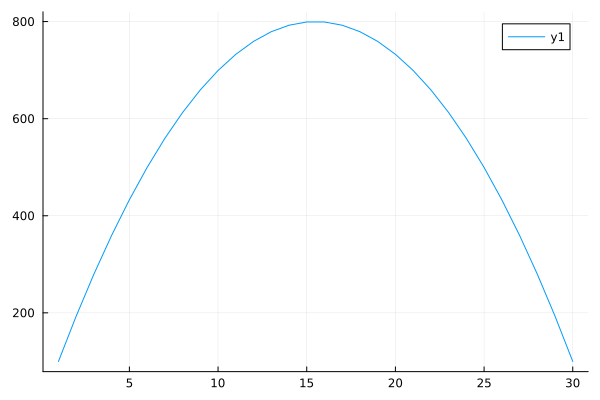

In [56]:
plot(x)